In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []

In [6]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cab30af5146fc2ee4a79713d706c5392


In [9]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 13 | goba
Processing Record 2 of Set 13 | tasiilaq
Processing Record 3 of Set 13 | hilo
Processing Record 4 of Set 13 | verkh-usugli
Processing Record 5 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 13 | hobart
Processing Record 7 of Set 13 | albany
Processing Record 8 of Set 13 | roebourne
Processing Record 9 of Set 13 | rikitea
Processing Record 10 of Set 13 | mataura
Processing Record 11 of Set 13 | bayevo
Processing Record 12 of Set 13 | avarua
Processing Record 13 of Set 13 | lorengau
Processing Record 14 of Set 13 | parrita
Processing Record 15 of Set 13 | alice springs
Processing Record 16 of Set 13 | geraldton
Processing Record 17 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 13 | joshimath
Processing Record 20 of Set 13 | tuktoyaktuk
Processing Record 21 of Set 13 | new norfolk
Processing Record 22 o

Processing Record 34 of Set 16 | sakakah
Processing Record 35 of Set 16 | coquimbo
Processing Record 36 of Set 16 | shipitsyno
Processing Record 37 of Set 16 | lewiston
Processing Record 38 of Set 16 | yeppoon
Processing Record 39 of Set 16 | lobatse
Processing Record 40 of Set 16 | tiksi
Processing Record 41 of Set 16 | broken hill
Processing Record 42 of Set 16 | sulangan
Processing Record 43 of Set 16 | salalah
Processing Record 44 of Set 16 | paamiut
Processing Record 45 of Set 16 | zongolica
Processing Record 46 of Set 16 | abu samrah
Processing Record 47 of Set 16 | dakar
Processing Record 48 of Set 16 | ust-maya
Processing Record 49 of Set 16 | boa vista
Processing Record 50 of Set 16 | howard springs
Processing Record 1 of Set 17 | road town
Processing Record 2 of Set 17 | hovd
Processing Record 3 of Set 17 | yangambi
Processing Record 4 of Set 17 | asau
Processing Record 5 of Set 17 | skibbereen
Processing Record 6 of Set 17 | bo phloi
Processing Record 7 of Set 17 | ostrovnoy

Processing Record 17 of Set 20 | sorland
Processing Record 18 of Set 20 | arrecife
Processing Record 19 of Set 20 | hualmay
Processing Record 20 of Set 20 | meulaboh
Processing Record 21 of Set 20 | belaya gora
Processing Record 22 of Set 20 | valenca
Processing Record 23 of Set 20 | pevek
Processing Record 24 of Set 20 | solnechnyy
Processing Record 25 of Set 20 | sitka
Processing Record 26 of Set 20 | cherskiy
Processing Record 27 of Set 20 | itacare
Processing Record 28 of Set 20 | aktau
Processing Record 29 of Set 20 | kaoma
Processing Record 30 of Set 20 | lunenburg
Processing Record 31 of Set 20 | naze
Processing Record 32 of Set 20 | kildinstroy
Processing Record 33 of Set 20 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 20 | athens
Processing Record 35 of Set 20 | cayenne
Processing Record 36 of Set 20 | viedma
Processing Record 37 of Set 20 | cerro largo
Processing Record 38 of Set 20 | ipilan
Processing Record 39 of Set 20 | bozeman
Processing Record

Processing Record 4 of Set 24 | hackettstown
Processing Record 5 of Set 24 | buchanan
Processing Record 6 of Set 24 | quatre cocos
Processing Record 7 of Set 24 | hambantota
Processing Record 8 of Set 24 | krasni okny
Processing Record 9 of Set 24 | goderich
Processing Record 10 of Set 24 | saint-francois
Processing Record 11 of Set 24 | castanos
Processing Record 12 of Set 24 | labuhan
Processing Record 13 of Set 24 | viligili
City not found. Skipping...
Processing Record 14 of Set 24 | ducheng
Processing Record 15 of Set 24 | kapuskasing
Processing Record 16 of Set 24 | sisimiut
Processing Record 17 of Set 24 | berlevag
Processing Record 18 of Set 24 | bonthe
Processing Record 19 of Set 24 | kamenka
Processing Record 20 of Set 24 | tessalit
Processing Record 21 of Set 24 | surt
Processing Record 22 of Set 24 | nemuro
Processing Record 23 of Set 24 | presidencia roque saenz pena
Processing Record 24 of Set 24 | conde
Processing Record 25 of Set 24 | carutapera
Processing Record 26 of 

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Goba,7.02,39.98,52.77,40,100,3.33,ET,2020-04-18 21:55:02
1,Tasiilaq,65.61,-37.64,33.80,80,100,14.99,GL,2020-04-18 21:55:03
2,Hilo,19.73,-155.09,82.40,51,40,11.41,US,2020-04-18 21:55:03
3,Verkh-Usugli,52.70,115.17,15.98,86,73,7.27,RU,2020-04-18 21:55:03
4,Hobart,-42.88,147.33,46.99,93,75,6.93,AU,2020-04-18 21:54:59
5,Albany,42.60,-73.97,46.99,57,93,4.00,US,2020-04-18 21:55:04
6,Roebourne,-20.78,117.13,82.44,57,100,7.85,AU,2020-04-18 21:55:04
7,Rikitea,-23.12,-134.97,77.09,73,18,7.54,PF,2020-04-18 21:55:04
8,Mataura,-46.19,168.86,43.30,89,100,4.52,NZ,2020-04-18 21:55:04
9,Bayevo,53.28,80.77,44.42,78,0,5.32,RU,2020-04-18 21:55:05


In [13]:
new_column=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column]
city_data_df.head(10)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Goba,ET,2020-04-18 21:55:02,7.02,39.98,52.77,40,100,3.33
1,Tasiilaq,GL,2020-04-18 21:55:03,65.61,-37.64,33.80,80,100,14.99
2,Hilo,US,2020-04-18 21:55:03,19.73,-155.09,82.40,51,40,11.41
3,Verkh-Usugli,RU,2020-04-18 21:55:03,52.70,115.17,15.98,86,73,7.27
4,Hobart,AU,2020-04-18 21:54:59,-42.88,147.33,46.99,93,75,6.93
5,Albany,US,2020-04-18 21:55:04,42.60,-73.97,46.99,57,93,4.00
6,Roebourne,AU,2020-04-18 21:55:04,-20.78,117.13,82.44,57,100,7.85
7,Rikitea,PF,2020-04-18 21:55:04,-23.12,-134.97,77.09,73,18,7.54
8,Mataura,NZ,2020-04-18 21:55:04,-46.19,168.86,43.30,89,100,4.52
9,Bayevo,RU,2020-04-18 21:55:05,53.28,80.77,44.42,78,0,5.32


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1587247053.2679121

In [17]:
today=time.strftime("%x")

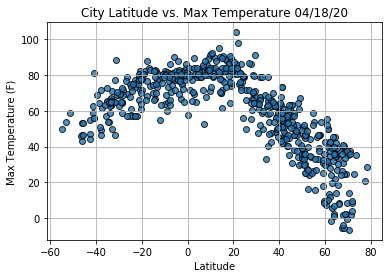

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

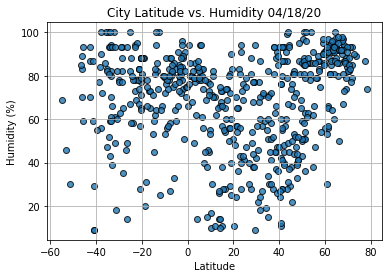

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

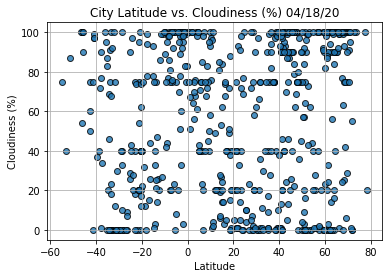

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

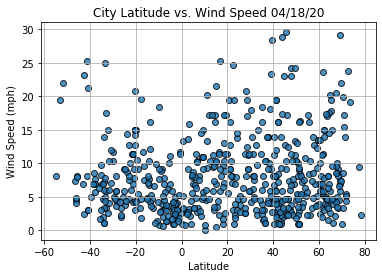

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
from scipy.stats import linregress

In [53]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Goba,ET,2020-04-18 21:55:02,7.02,39.98,52.77,40,100,3.33
1,Tasiilaq,GL,2020-04-18 21:55:03,65.61,-37.64,33.80,80,100,14.99
2,Hilo,US,2020-04-18 21:55:03,19.73,-155.09,82.40,51,40,11.41
3,Verkh-Usugli,RU,2020-04-18 21:55:03,52.70,115.17,15.98,86,73,7.27
5,Albany,US,2020-04-18 21:55:04,42.60,-73.97,46.99,57,93,4.00


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

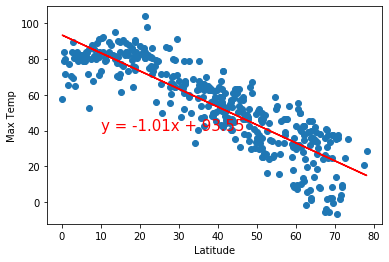

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

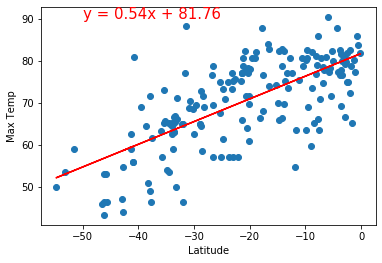

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

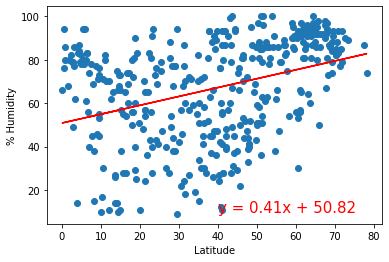

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

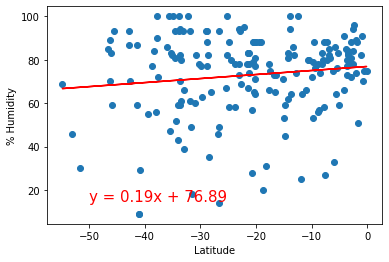

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

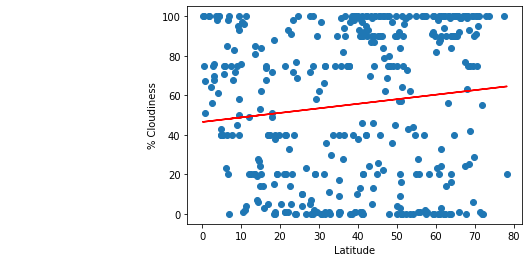

In [72]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness ', '% Cloudiness',(-50,15))

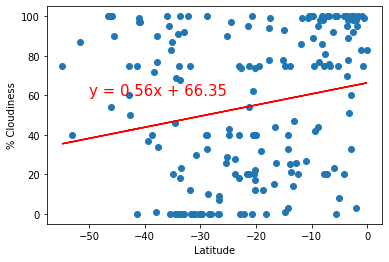

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

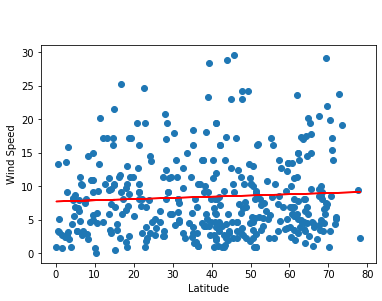

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

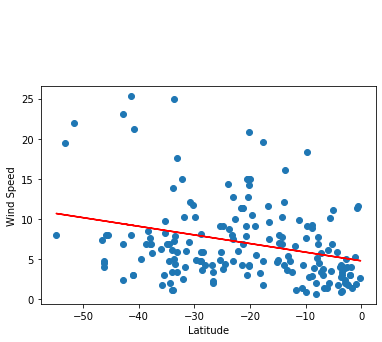

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))